In [2]:
# This code demonstrates RSA. 
# It's a modified version of David Liu's and Mario Badr (U of Toronto) code available at 
# https://www.teach.cs.toronto.edu/~csc110y/fall/notes/
# Written by Rogério de Sousa for UVic Phys223.


import matplotlib.pyplot as plt
import numpy as np
import random

#import scipy.integrate as integrate
#from scipy.special import kn
#import mpmath as mp

# Stuff to set figure parameters
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#This should be white by default but I just set it as white to avoid issues
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'


In [3]:
# Euclidian greatest common denominator (egcd)
#
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)
#
# Modular inverse
#
def modular_inverse(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m
#
#


def rsa_generate_key(p: int, q: int) -> \
        tuple[tuple[int, int, int], tuple[int, int]]:
    """Return an RSA key pair generated using primes p and q.

    The return value is a tuple containing two tuples:
      1. The first tuple is the private key, containing (p, q, d).
      2. The second tuple is the public key, containing (n, e).

    Preconditions:
        - p and q are prime
        - p != q
    """
    # Compute the product of p and q
    n = p * q

    # Choose e such that gcd(e, phi_n) == 1.
    phi_n = (p - 1) * (q - 1)

    # Since e is chosen randomly, we repeat the random choice
    # until e is coprime to phi_n.
    e = random.randint(2, phi_n - 1)
    while egcd(e, phi_n)[0] != 1:
        e = random.randint(2, phi_n - 1)

    # Choose d such that e * d % phi_n = 1.
    # Notice that we're using our modular_inverse from our work in the last chapter!
    d = modular_inverse(e, phi_n)

    return ((p, q, d), (n, e))
#
#
#
def rsa_encrypt(public_key: tuple[int, int], plaintext: int) -> int:
    """Encrypt the given plaintext using the recipient's public key.    
    Preconditions:
        - public_key is a valid RSA public key (n, e)
        - 0 < plaintext < public_key[0]
    """
    n, e = public_key[0], public_key[1]

    encrypted = (plaintext ** e) % n

    return encrypted
#
def rsa_decrypt(private_key: tuple[int, int, int], ciphertext: int) -> int:
    """Decrypt the given ciphertext using the recipient's private key.

    Preconditions:
        - private_key is a valid RSA private key (p, q, d)
        - 0 < ciphertext < private_key[0] * private_key[1]
    """
    p, q, d = private_key[0], private_key[1], private_key[2]
    n = p * q

    decrypted = (ciphertext ** d) % n

    return decrypted
#
#

In [10]:
vec = rsa_generate_key(3, 151)
print(vec)

((3, 151, 167), (453, 203))


In [11]:
vec[1]

(453, 203)

In [13]:
p = 17
q = 241
[priv_key, pub_key] = rsa_generate_key(p, q)
print(priv_key)
print(pub_key)
nn = p*q
#
#I_list = np.linspace(2,nn-1,nn-2).astype('int')
#
#print(I_list)
#
enc_list = [rsa_encrypt(pub_key, i+2) for i in range(nn-2)]
print(enc_list)
dec_list = [rsa_decrypt(priv_key, enc_list[i]) for i in range(nn-2)]
print(dec_list)

(17, 241, 1891)
(4097, 331)
[3969, 772, 4093, 79, 3609, 779, 512, 1919, 2179, 811, 1009, 3948, 2713, 3630, 16, 3587, 188, 1776, 3781, 3226, 2714, 3558, 1952, 2144, 2684, 2451, 981, 2097, 2418, 2203, 2049, 3348, 3825, 86, 518, 296, 2104, 3785, 3575, 1714, 869, 1290, 853, 12, 3440, 2044, 61, 485, 67, 3689, 596, 705, 1741, 2614, 1439, 2674, 1986, 2008, 1868, 530, 709, 3593, 4033, 520, 1641, 50, 2040, 1786, 1283, 2931, 3345, 3717, 3082, 4077, 1090, 831, 3063, 1933, 1264, 3455, 1846, 1845, 3484, 680, 2857, 569, 1435, 1186, 2561, 2742, 2156, 461, 576, 1006, 386, 1349, 3472, 3546, 3715, 1308, 3060, 3996, 1555, 840, 3991, 2544, 2487, 2547, 1362, 3177, 173, 2171, 1876, 2486, 3903, 859, 1087, 119, 2619, 2201, 1809, 3974, 3479, 1399, 3057, 1498, 4095, 309, 3089, 2012, 2996, 2815, 1794, 1070, 1088, 3265, 824, 2965, 3753, 623, 1756, 2071, 2025, 1783, 3573, 1593, 2913, 3387, 2560, 1777, 3875, 493, 154, 1963, 1248, 1577, 2493, 3456, 2088, 2110, 236, 1516, 1338, 2284, 1466, 2220, 621, 1716, 3094, 3537

(p, q, d)= (71, 53, 1947)
(N, c)= (3763, 43)


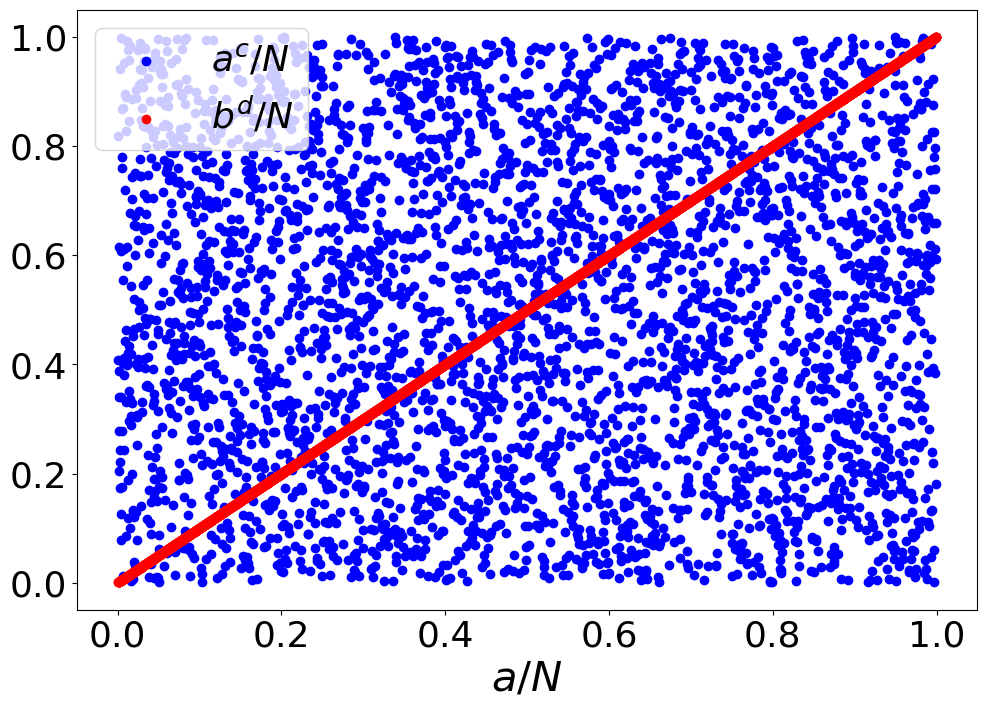

In [16]:
# Generate figure to show randomness of RSA
#
p = 71
q = 53
#
[priv_key, pub_key] = rsa_generate_key(p, q)
print('(p, q, d)=', priv_key)
print('(N, c)=', pub_key)
nn = p*q
#
in_list = [(i+2) for i in range(nn-2)]
#print(in_list)
#
enc_list = [rsa_encrypt(pub_key, i+2) for i in range(nn-2)]
#print(enc_list)
dec_list = [rsa_decrypt(priv_key, enc_list[i]) for i in range(nn-2)]
#print(dec_list)
#
dec_list = [rsa_decrypt(priv_key, enc_list[i]) for i in range(nn-2)]
#print(dec_list)


fig = plt.figure(1,figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("$a/N$")
#ax.set_ylabel("$b/N$")
#
in2 = [in_list[i]/nn for i in range(nn-2)]
enc2 = [enc_list[i]/nn for i in range(nn-2)]
dec2 = [dec_list[i]/nn for i in range(nn-2)]
#
plt.scatter(in2, enc2, c='b', label = '$a^{c}/N$')
plt.scatter(in2, dec2, c='r', label = '$b^{d}/N$')

plt.legend(loc="upper left")

plt.show(1)
#fig.savefig('figure.png', dpi=200, bbox_inches='tight')

(p, q, d)= (61, 53, 1321)
(N, c)= (3233, 2761)


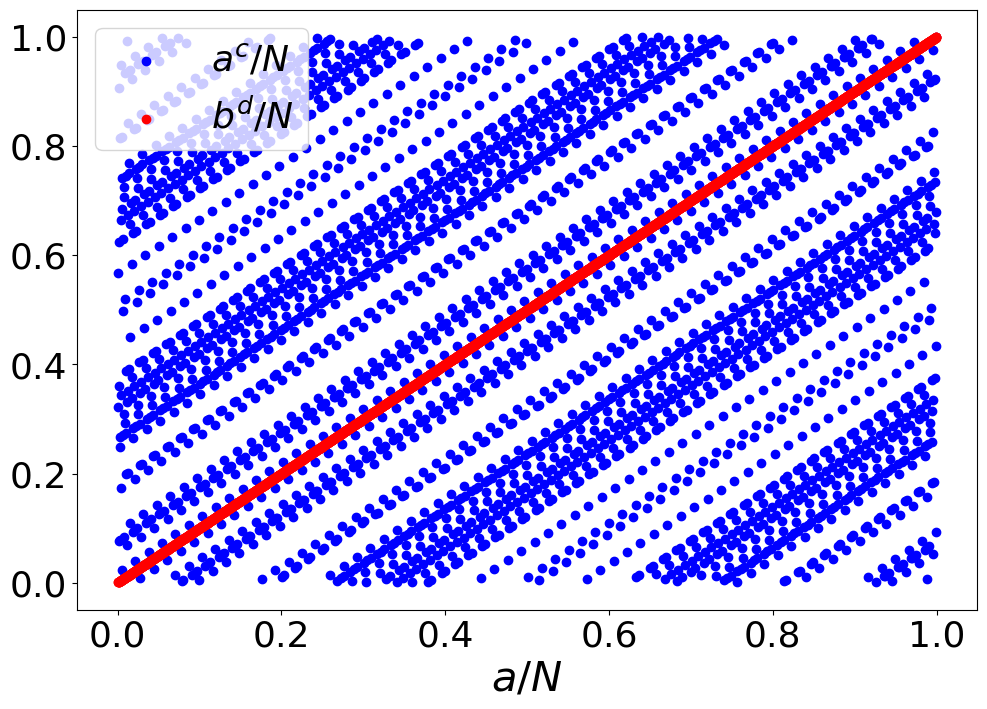

In [17]:
# It doesn't always look that random. Sometimes the following happens:
#
p = 61
q = 53
#
[priv_key, pub_key] = [(61, 53, 1321), (3233, 2761)]
print('(p, q, d)=', priv_key)
print('(N, c)=', pub_key)
nn = p*q
#
in_list = [(i+2) for i in range(nn-2)]
#print(in_list)
#
enc_list = [rsa_encrypt(pub_key, i+2) for i in range(nn-2)]
#print(enc_list)
dec_list = [rsa_decrypt(priv_key, enc_list[i]) for i in range(nn-2)]
#print(dec_list)
#
dec_list = [rsa_decrypt(priv_key, enc_list[i]) for i in range(nn-2)]
#print(dec_list)


fig = plt.figure(1,figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("$a/N$")
#ax.set_ylabel("$b/N$")
#
in2 = [in_list[i]/nn for i in range(nn-2)]
enc2 = [enc_list[i]/nn for i in range(nn-2)]
dec2 = [dec_list[i]/nn for i in range(nn-2)]
#
plt.scatter(in2, enc2, c='b', label = '$a^{c}/N$')
plt.scatter(in2, dec2, c='r', label = '$b^{d}/N$')

plt.legend(loc="upper left")

plt.show(1)
#fig.savefig('figure.png', dpi=200, bbox_inches='tight')

Why does it look less random? I have no idea.

In [9]:
egcd(2761, 60*52)

(1, 1321, -1169)

Sounds like this happens when the second tuple of egcd(c,(p-1)(q-1))=d. 